- Valor medio = Valor de la pendiente, dentro del intervalox 
- Iteraciones de punto fijo
- Punto fijo como un atractor
- Unicidad del punto fijo
- Teorema del punto fijo

Iniciemos entendiendo el teorema del valor intermedio:

Sea $f:[a, b] \rightarrow \mathbb{R}$ una función continua en el intervalo cerrado $[a, b]$ y diferenciable en el intervalo abierto $(a, b)$ con $a<b$ entonces existe al menos algún punto $c \in(a, b)$ tal que
$$
f^{\prime}(c)=\frac{f(b)-f(a)}{b-a}
$$


Veamos algunas funciones, para visualizar el teorema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

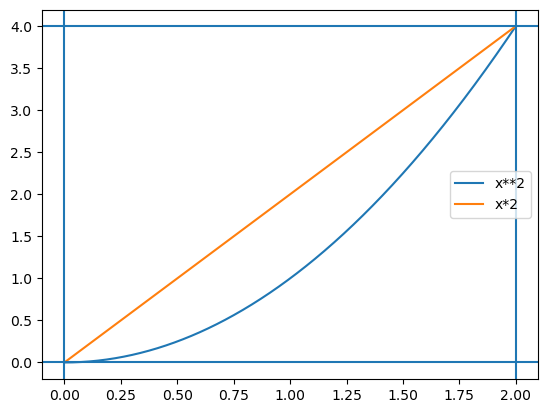

In [71]:
f = lambda x: x**2
df = lambda x: 2*x 
xs = np.arange(0, 2, 0.0025)
plt.plot(xs, f(xs), label = "x**2")
plt.plot(xs, xs *2, label = "x*2")
plt.axhline(0); plt.axhline(4)
plt.axvline(0); plt.axvline(2)


plt.legend()

Para este caso tenemos que $f^\prime(c) = \frac{f(2) -f(0)}{2-0} = \frac{4}{2} = 2$

Si $f:[a, b] \rightarrow \mathbb{R}$ es una función continua en un intervalo cerrado $[a, b]$, derivable en el intervalo abierto $(a, b)$ y $f(a)=f(b)$, entonces existe al menos un punto $c \in(a, b)$ tal que:
$$
f^{\prime}(c)=0
$$

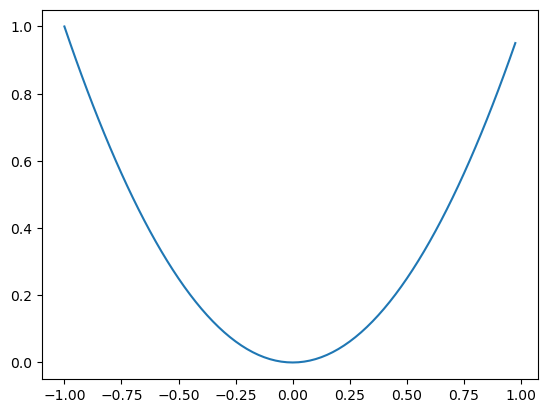

In [13]:
f = lambda x: x**2
xs = np.arange(-1,1, 0.025)
plt.plot(xs, f(xs))

- Aquí ya podemos ver ciertas intuciones, de que el teorema quiere asegurar el punto medio de la función en un intervalo dado. Siendo la función continua

Veamos mas ejemplos de esto:

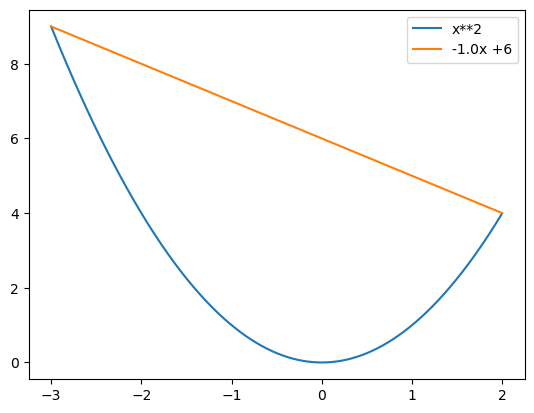

In [70]:
f = lambda x: x**2
a, b = -3, 2
fd_c = (f(b)-f(a)) /(b-a)
xs = np.arange(a, b, 0.0025)
plt.plot(xs, f(xs), label = "x**2")
plt.plot(xs, xs *fd_c +6, label = f"{fd_c}x +6")
plt.legend()

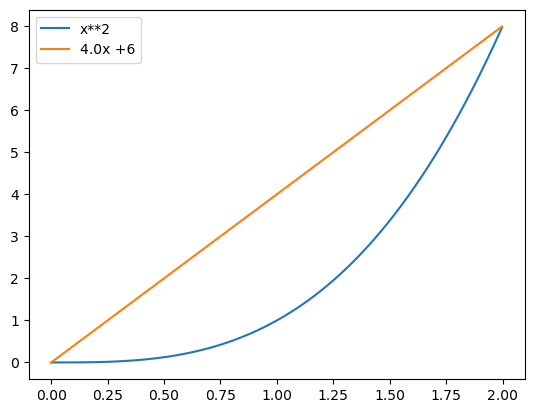

In [73]:
f = lambda x: x**3
a, b = 0, 2
fd_c = (f(b)-f(a)) /(b-a)
xs = np.arange(a, b, 0.0025)
plt.plot(xs, f(xs), label = "x**2")
plt.plot(xs, xs *fd_c , label = f"{fd_c}x +6")
plt.legend()

Ahora veamos porque el punto fijo es único si la derivada en el intervalo es menor que uno

0.0


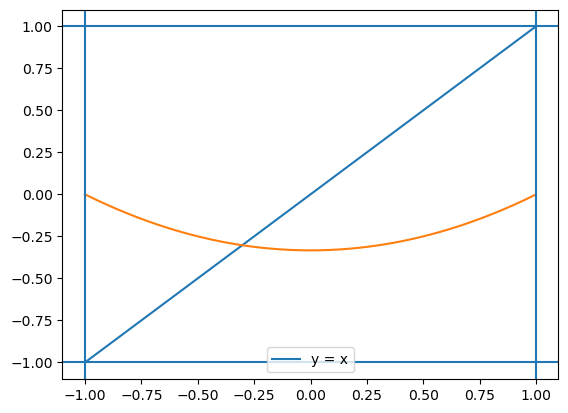

In [96]:
r = lambda x: x
f = lambda x: (x**2-1)/3
a, b = -1, 1
df_c = (f(b)-f(a)) /(b-a); print(df_c)
xs = np.arange(a, b, 0.002)
plt.plot(xs, xs, label = "y = x")
plt.plot(xs, f(xs))
plt.legend()
plt.axvline(a)
plt.axvline(b)

plt.axhline(a)
plt.axhline(b)

### Preguntas

- Cual es la intución, de, si la derivada es menor a uno, existe un solo punto fijo.

Si, además, $g^{\prime}(x)$ existe en $(a, b)$ y hay una constante positiva $k<1$ con $\left|g^{\prime}(x)\right| \leq k, \quad$ para todas las $x \in(a, b)$, entonces, existe exactamente un punto fijo en $[a, b]$.

Suponga, además, que $\left|g^{\prime}(x)\right| \leq k<1$ y que $p$ y $q$ son puntos fijos en $[a, b]$. Si $p \neq q$, entonces el teorema de valor medio implica que existe un número $\xi$ entre $p$ y $q$ y por lo tanto en $[a, b]$ con
$$
\frac{g(p)-g(q)}{p-q}=g^{\prime}(\xi) .
$$

Por lo tanto
$$
|p-q|=|g(p)-g(q)|=\left|g^{\prime}(\xi)\right||p-q| \leq k|p-q|<|p-q|,
$$
lo cual es una contradicción. Esta contradicción debe provenir de la única suposición $p \neq q$. Por lo tanto, $p=q$ y el punto fijo en $[a, b]$ es único.